In [1]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image 
#%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('final_dataset.csv',index_col=0)

In [3]:
tform = transforms.Compose([transforms.Resize((256,256)),transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float)])
image_dataset = torchvision.datasets.ImageFolder("image_dataset/",transform=tform)


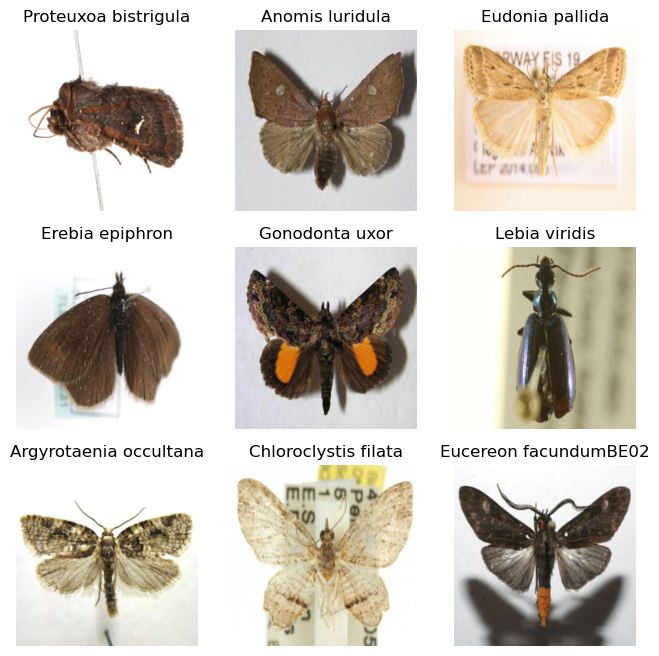

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(image_dataset), size=(1,)).item()
    img, label = image_dataset[sample_idx]
    img = transforms.functional.to_pil_image(img)
    figure.add_subplot(rows, cols, i)
    species_name = (list(image_dataset.class_to_idx.keys())[label]).replace('_',' ')
    plt.title(species_name)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [5]:
import dataset_utils
img2dna = dataset_utils.get_imgs_bold_id(image_dataset,df)

In [9]:
import random


nucleotides = df[['nucleotide','species_name','genus_name','processid','image_urls']]
colonna_dna = df.loc[:,"nucleotide"]
nucleotides.loc[:,'nucleotide'] = colonna_dna.apply(dataset_utils.one_hot_encoding)
random.seed(42)

X_train_1, X_test, y_train_1, y_test = dataset_utils.data_split(nucleotides,0.3)

train_data = X_train_1
train_data['species_name'] = y_train_1

X_train, X_validation, y_train, y_validation = dataset_utils.data_split(train_data,0.2,drop_labels=False)
#X_train = X_train.drop(columns=['genus_name'])
#X_validation= X_validation.drop(columns=['genus_name'])
#X_test = X_test.drop(columns=['genus_name'])

In [10]:
X_validation

,nucleotide,species_name,genus_name,processid,image_urls
361,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0....",Hemiceras plana,Hemiceras,BLPDC199-09,http://v3.boldsystems.org/pics/BLPDC/08-SRNP-1...
212,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0....",Cantharis pellucida,Cantharis,FBCOE720-12,http://v3.boldsystems.org/pics/FBCOE/BC_ZSM_CO...
217,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0....",Harpalus serripes,Harpalus,FBCON019-13,http://v3.boldsystems.org/pics/FBCON/BFB_Col_F...
203,"[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0....",Bembidion properans,Bembidion,COLFD893-12,http://v3.boldsystems.org/pics/COLFD/ZMUO.0045...
296,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0....",Cleora repetita,Cleora,GWOR1172-07,http://v3.boldsystems.org/pics/GAUE/BC_ZSM_Lep...
...,...,...,...,...,...
110,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0....",Hemiceras plana,Hemiceras,BLPCJ896-08,http://v3.boldsystems.org/pics/BLNTA/07-SRNP-1...
63,"[[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1....",Micropsectra radialis,Micropsectra,CHRSV072-08,http://v3.boldsystems.org/pics/CHRSV/SV201+123...
2,"[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0....",Simulium escomeli,Simulium,BNBMP604-09,http://v3.boldsystems.org/pics/BNBMP/BNB200604...
398,"[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0....",Idaea costaria,Idaea,PHLCC591-11,http://v3.boldsystems.org/pics/PHLCC/IMG_8665+...


In [8]:
#image_dataset.imgs
raise Exception

Exception: 

In [11]:
type(image_dataset)

torchvision.datasets.folder.ImageFolder

In [ ]:
train_indices, val_indices, test_indices = dataset_utils.image_splits_from_df(X_train,X_validation,X_test,image_dataset)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class WholeDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.targets = data.targets#torch.tensor(targets)
        #self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index][0]
        y = self.targets[index]
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [ ]:
whole_dataset = WholeDataset(image_dataset)
whole_dataset[0][0].shape

In [ ]:
print(len(test_indices+val_indices+train_indices))
len(whole_dataset)

In [ ]:
train_imgs = torch.utils.data.Subset(whole_dataset, train_indices)
val_imgs = torch.utils.data.Subset(whole_dataset, val_indices)
test_imgs = torch.utils.data.Subset(whole_dataset, test_indices)

In [ ]:
len(train_imgs)+len(val_imgs)+len(test_imgs)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_imgs, batch_size=64,shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_imgs, batch_size=64,shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_imgs, batch_size=4,shuffle=True, num_workers=2)
del test_loader
dataloaders = {"train":train_loader,"val":val_loader}
dataset_sizes = {'train': len(train_imgs.indices), 'val':len(val_imgs.indices)}

In [ ]:
print(len(train_imgs.indices))
print(len(val_imgs.indices))
print(len(test_imgs.indices))

In [ ]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.conv1 = torch.nn.Conv2d(3,8,3)
        self.activation1 = torch.nn.LeakyReLU()
        self.norm1 = torch.nn.BatchNorm2d(8)
        self.maxpool1 = torch.nn.MaxPool2d(2)
        self.conv2 = torch.nn.Conv2d(8,1,3)
        self.activation2 = torch.nn.LeakyReLU()
        self.norm2 = torch.nn.BatchNorm2d(1)
        self.maxpool2 = torch.nn.MaxPool2d(3)
        self.flat = torch.nn.Flatten()
        self.linear = torch.nn.Linear(1681,1500)
        self.dropout= torch.nn.Dropout(0.30)
        self.activation3 = torch.nn.LeakyReLU()
        self.linear2 = torch.nn.Linear(1500,1050)
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation1(x)
        x = self.norm1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.activation2(x)
        x = self.norm2(x)
        x = self.maxpool2(x)
        x = self.flat(x)
        x = self.linear(x)
        x = self.dropout(x)
        x = self.activation3(x)
        x = self.linear2(x)
        return x
tinymodel = TinyModel()
tinymodel.cuda()
optimizer = torch.optim.Adam(tinymodel.parameters(),weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.005,epochs= 25, steps_per_epoch= 10) 


In [ ]:
import time
from tempfile import TemporaryDirectory
import os
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    #inputs = inputs[:,None,:,:]
                    inputs = inputs.to(device)
                    #print(inputs.shape)
                    labels = labels.to(device)
                    

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, tinymodel.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

In [ ]:
train_model(tinymodel,torch.nn.CrossEntropyLoss(),optimizer,scheduler)